# Experiementing with Maximum Likelihood Parameter Estimation (MLE)
(Basic linear regression using Maximum Likelihood Parameter Estimation)

In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

## Generate data

In [2]:
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

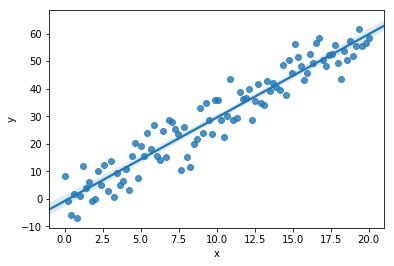

In [3]:
sns.regplot(df.x, df.y);

In [4]:
X = np.array(df[['constant', 'x']])

## fit model and summarize

In [5]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1059.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           2.44e-54
Time:                        11:50:43   Log-Likelihood:                -309.98
No. Observations:                 100   AIC:                             624.0
Df Residuals:                      98   BIC:                             629.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7712      1.077     -0.716      0.476      -2.908       1.366
x1             3.0273      0.093     32.544      0.000       2.843       3.212
==============================================================================
Omnibus:                        1.882   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.384
Skew:                          -0.013   Prob(JB):                        0.501
Kurtosis:                       2.424   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Maximum Likelihood 

### define likelihood function


In [6]:
def MLERegression(params):
    intercept, beta, std = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions
    
    # next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=std) )
    # return negative LL
    return(negLL)

In [7]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', 
          options={'disp': True})

Optimization terminated successfully.
         Current function value: 309.978102
         Iterations: 99
         Function evaluations: 172


In [8]:
results

 final_simplex: (array([[-0.77116854,  3.02734601,  5.37007772],
       [-0.77123198,  3.02734835,  5.37008295],
       [-0.77125004,  3.02735204,  5.37010518],
       [-0.77117624,  3.02734295,  5.37008502]]), array([309.97810188, 309.97810188, 309.97810188, 309.97810188]))
           fun: 309.9781018759185
       message: 'Optimization terminated successfully.'
          nfev: 172
           nit: 99
        status: 0
       success: True
             x: array([-0.77116854,  3.02734601,  5.37007772])

In [9]:
coefficients = results['x'][0:-1] 

In [10]:
y_pred = X.dot(coefficients)

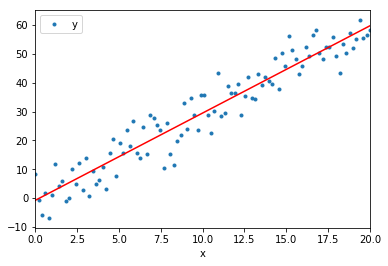

In [11]:
fig,ax = plt.subplots()
df.plot(x='x', y='y', ax=ax, style = '.')
ax.plot(x, y_pred,'r-')